In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2025-07-07 20:25:01.562619: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-07 20:25:01.563576: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-07 20:25:01.566645: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-07 20:25:01.575130: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751930701.588976  121727 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751930701.59

In [2]:
def criar_modelo():
    model = Sequential([
        Dense(64, activation='tanh', input_shape=(1,)),
        Dense(64, activation='tanh'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def treinar_e_plotar(func, x_range, nome_funcao, cor):
    # Dados de entrada
    X = np.linspace(*x_range, 1000)
    X = X.reshape(-1, 1)
    
    # Função alvo
    if func == 'sin':
        y = np.sin(X)
    elif func == 'sinc':
        y = np.sinc(X / np.pi)  # sinc(x) = sin(x)/x
    elif func == 'exp':
        y = np.exp(-X**2)
    else:
        raise ValueError("Função desconhecida")

    # Criar e treinar o modelo
    model = criar_modelo()
    model.fit(X, y, epochs=500, verbose=0)

    # Predições
    y_pred = model.predict(X)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(X, y, label=f"{nome_funcao}", color=cor)
    plt.plot(X, y_pred, label="Rede Neural", linestyle='--', color='black')
    plt.title(f"Aproximação de {nome_funcao} com Rede Neural")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


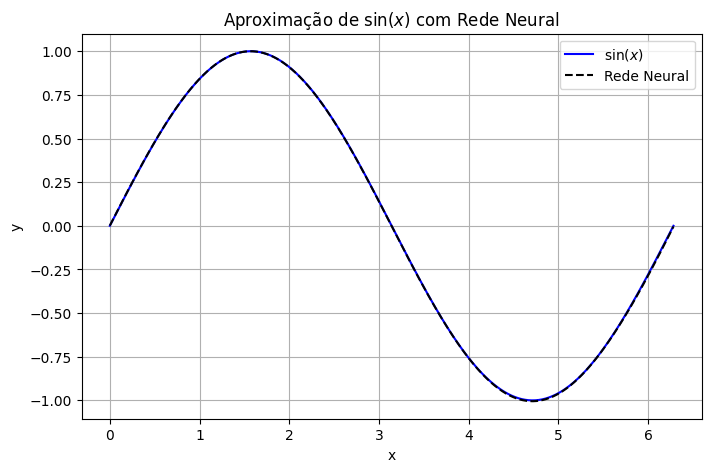

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


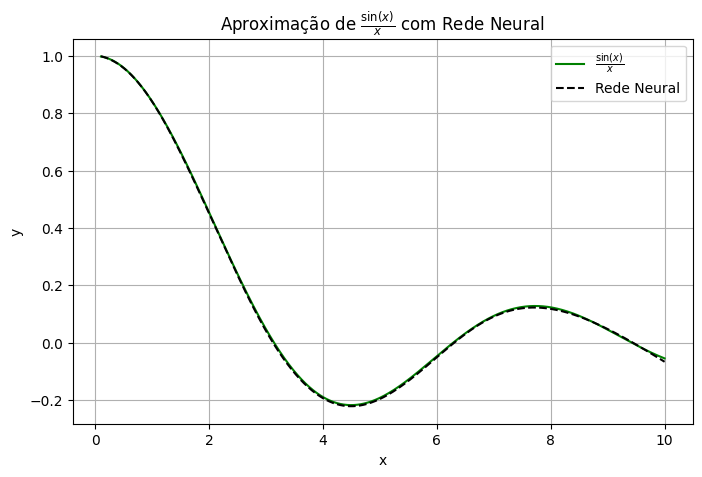

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


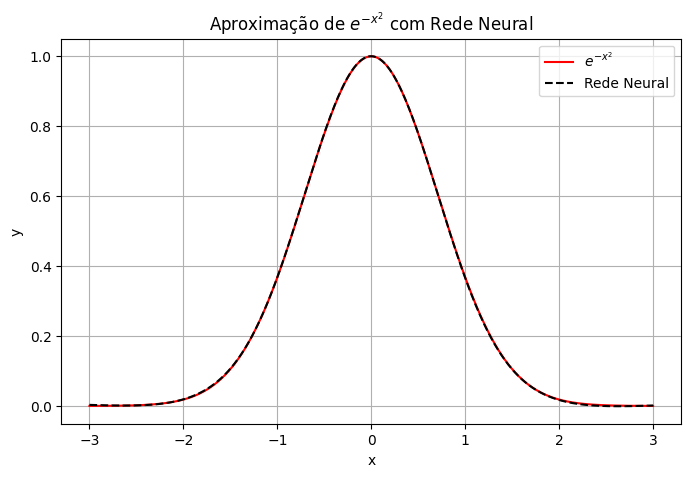

In [4]:
# 1. sin(x)
treinar_e_plotar(func='sin', x_range=(0, 2 * np.pi), nome_funcao=r"$\sin(x)$", cor='blue')

# 2. sin(x)/x
treinar_e_plotar(func='sinc', x_range=(0.1, 10), nome_funcao=r"$\frac{\sin(x)}{x}$", cor='green')

# 3. e^{-x^2}
treinar_e_plotar(func='exp', x_range=(-3, 3), nome_funcao=r"$e^{-x^2}$", cor='red')